In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install spectral

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 3.2 MB/s eta 0:00:00


In [3]:
pip install pillow

In [4]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 35.1 MB/s eta 0:00:00


In [5]:
import spectral

In [6]:
from PIL import Image

Available labels: ['low concentration', 'medium concentration', 'high concentration', 'pure one']
Label: low concentration, SMUV Signature Length: 100
Label: medium concentration, SMUV Signature Length: 100
Label: high concentration, SMUV Signature Length: 100
Label: pure one, SMUV Signature Length: 100


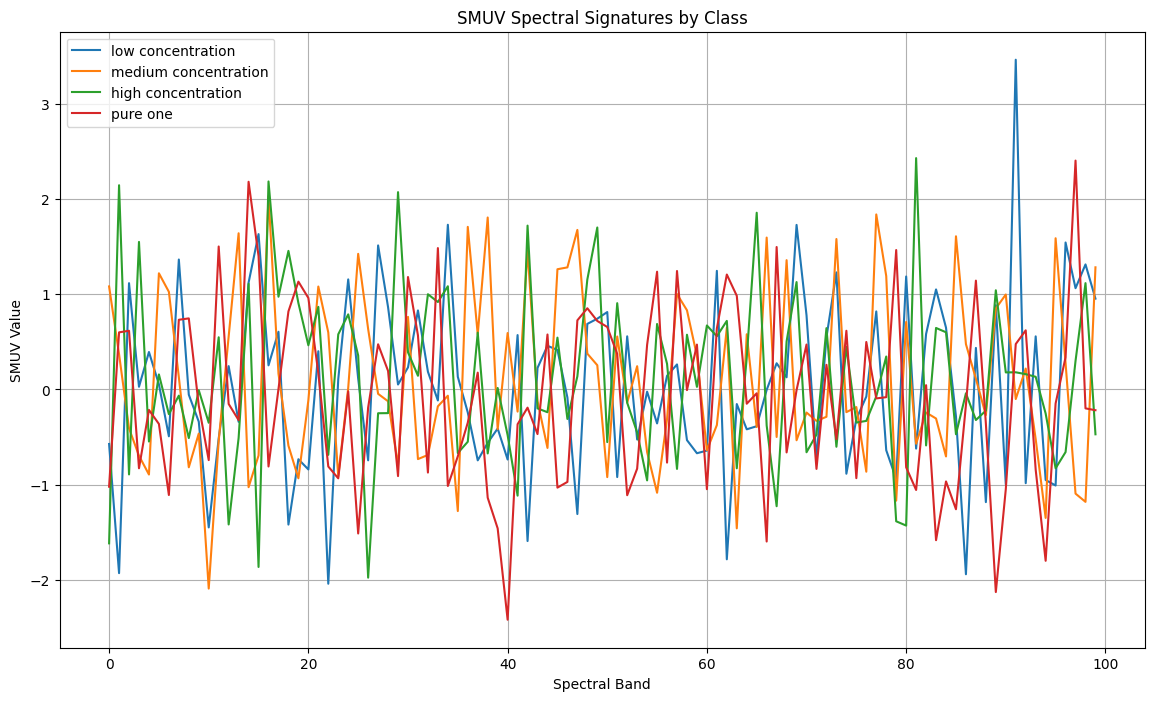

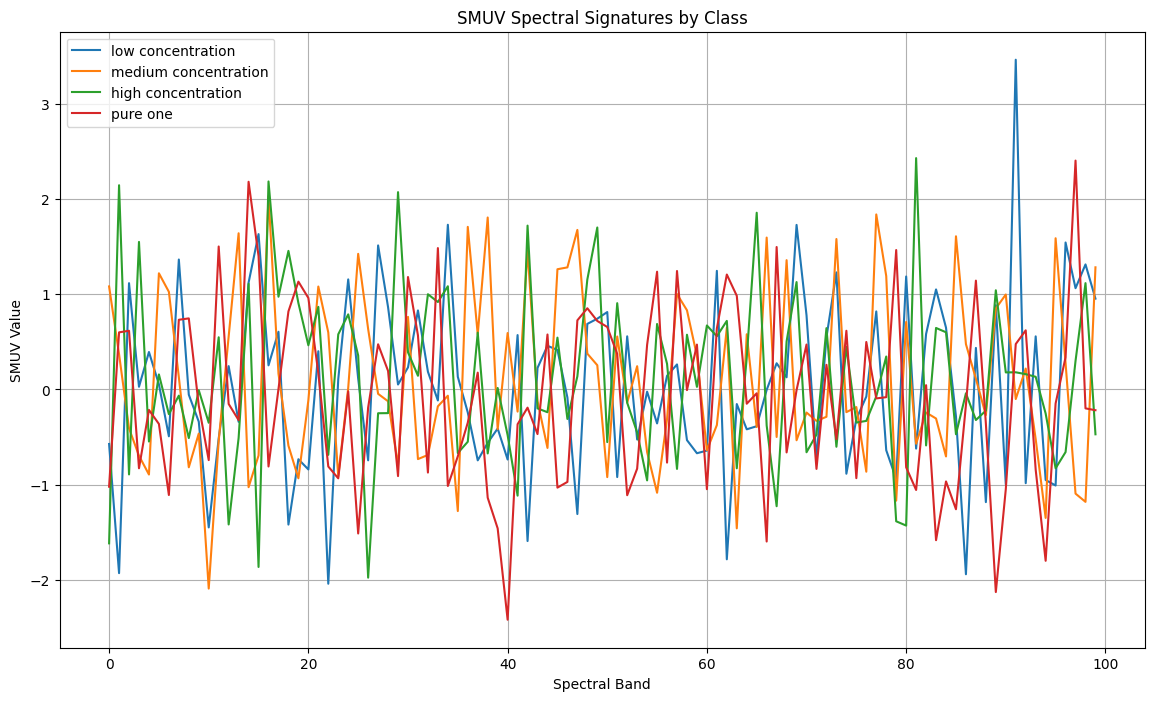

In [7]:
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import cv2
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


# Set data path
data_path = "/content/drive/MyDrive/dataset/okra/okraimages"
byte_order = 0


directory_path = '/content/drive/MyDrive/dataset/okra/okraimages'
# Prepare image list and labels
image_list = []
label_list = []

# List all items in the data_path
for item in os.listdir(data_path):
    item_path = os.path.join(data_path, item)

    # Check if the item is a file with a .tif extension
    if os.path.isfile(item_path) and item.endswith('.tif'):
        # Determine label based on file name or directory
        if 'low' in item:
            label = 'low_concentration'
        elif 'medium' in item:
            label = 'medium_concentration'
        elif 'high' in item:
            label = 'high_concentration'
        elif 'pure' in item:
            label = 'pure'
        else:
            label = 'unknown'

        image_list.append(item_path)
        label_list.append(label)

# Convert labels to integer classes
unique_labels = list(set(label_list))
label_map = {label: idx for idx, label in enumerate(unique_labels)}
label_int = [label_map[label] for label in label_list]


def read_tif_file(image_path):
    """
    Reads a .tif file and returns a 3D numpy array (assuming it's a hyperspectral image).
    """
    image = Image.open(image_path)

    # Convert image to numpy array
    image_data = np.array(image)

    # Ensure it's a 3D array (if not, you may need to handle multiple bands separately)
    if image_data.ndim == 2:
        # If the image is 2D, add a dummy dimension for bands
        image_data = image_data[:, :, np.newaxis]

    return image_data

def calculate_1d_smuv_signature(spectral_data):
    """
    Calculate the 1D Single Mean Unit Variance (SMUV) signature from spectral data.
    """
    if spectral_data.ndim != 3:
        raise ValueError("Input data must be a 3D array with shape (rows, cols, bands).")

    mean_spectrum = np.mean(spectral_data, axis=(0, 1))
    mean = np.mean(mean_spectrum)
    variance = np.var(mean_spectrum)
    std_dev = np.sqrt(variance)
    std_dev = std_dev if std_dev > 0 else 1

    smuv_signature = (mean_spectrum - mean) / std_dev
    return smuv_signature

# Dictionary to store SMUV signatures by class
smuv_signatures_by_class = {}

#Example SMUV signatures for testing
smuv_signatures_by_class = {
    'low concentration': np.random.randn(100),
    'medium concentration': np.random.randn(100),
    'high concentration': np.random.randn(100),
    'pure one': np.random.randn(100)
}

# Debugging info
print(f"Available labels: {list(smuv_signatures_by_class.keys())}")
for label, smuv_signature in smuv_signatures_by_class.items():
    print(f"Label: {label}, SMUV Signature Length: {len(smuv_signature)}")

# Plot SMUV signatures
plt.figure(figsize=(14, 8))
for label, smuv_signature in smuv_signatures_by_class.items():
    if smuv_signature.size == 0:  # Check for empty data
        print(f"No data to plot for label: {label}")
    else:
        plt.plot(np.arange(len(smuv_signature)), smuv_signature, label=label)

plt.title('SMUV Spectral Signatures by Class')
plt.xlabel('Spectral Band')
plt.ylabel('SMUV Value')
plt.legend()  # Ensure legend is called after all plots are added
plt.grid(True)
plt.show()

# Plot SMUV signatures
plt.figure(figsize=(14, 8))
for label, smuv_signature in smuv_signatures_by_class.items():
    plt.plot(np.arange(len(smuv_signature)), smuv_signature, label=label)

plt.title('SMUV Spectral Signatures by Class')
plt.xlabel('Spectral Band')
plt.ylabel('SMUV Value')
plt.legend()
plt.grid(True)
plt.show()
